1. Описание данных:

**Предметная область**: Анализ экономических индикаторов на основе синтетических данных.

**Источник данных**: https://www.kaggle.com/datasets/harshvir04/index-value-economic-dataset

**Характер данных**: Синтетические данные.

**Атрибуты**:
- **Year** (год): Год наблюдения.
- **Month** (месяц): Месяц наблюдения.
- **Interest Rate** (процентная ставка): Процентная ставка, действующая на момент наблюдения.
- **Unemployment Rate** (уровень безработицы): Уровень безработицы в процентах на момент наблюдения.
- **Index Price** (ценовой индекс): Синтетический индекс фондового рынка, отражающий общие рыночные тренды.

**Описание задачи анализа**: Анализ экономических показателей поиск связей и корреляций.


1) Загрузка датасета

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Функция для загрузки и предобработки данных
def load_and_prepare_data(file_path):
    """
    Загрузка датасета, создание столбца с датой.
    """
    data = pd.read_csv(file_path)

    # Исключение столбцов с именем 'Unnamed', если они существуют
    data = data.loc[:, ~data.columns.str.contains('^Unnamed')]

    # Конвертация года и месяца в формат даты
    data['Date'] = pd.to_datetime(data[['year', 'month']].assign(DAY=1))

    return data

#Загрузка и предобработка данных
data = load_and_prepare_data("/content/SuperDataSet.csv")

2) Статистический анализ

In [10]:
# Рассчитаем статистики: средние и стандартное отклонение
def calculate_stats(data):
    """
    Возвращает средние значения и стандартные отклонения по каждому атрибуту.
    """
    stats_summary = data.describe().T[['mean', 'std']]
    print("\nСтатистические данные (среднее и стандартное отклонение):\n", stats_summary)
    return stats_summary


stats = calculate_stats(data)


Статистические данные (среднее и стандартное отклонение):
                                   mean         std
year                            1973.5   28.878105
month                              6.5    3.453492
interest_rate                  3.04005    0.983762
unemployment_rate             5.049392    1.445544
index_price                 407.213139  339.826463
Date               1973-12-15 23:00:00         NaN


3)Обработка пропущенных значений

In [11]:
# Обработка пропущенных значений, заполняем средним значением
def fill_missing_values(data):
    """
    Заполняет пропущенные значения средними значениями по столбцам.
    """
    missing_info = data.isnull().sum()
    print("\nКоличество пропущенных значений по столбцам:\n", missing_info)

    # Заполнение пропусков средними значениями
    data.fillna(data.mean(), inplace=True)
    print("\nПропущенные значения были заполнены средними значениями.")

    return data



data = fill_missing_values(data)


Количество пропущенных значений по столбцам:
 year                 0
month                0
interest_rate        0
unemployment_rate    0
index_price          0
Date                 0
dtype: int64

Пропущенные значения были заполнены средними значениями.


4) Анализ распределения данных и выбросов

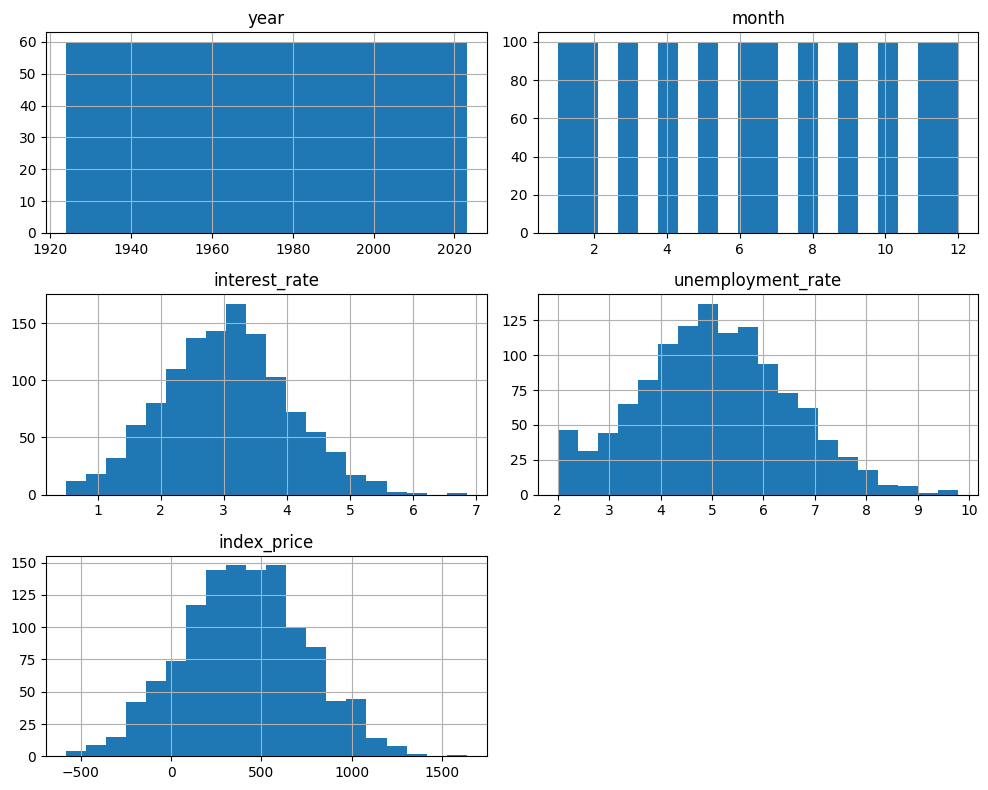

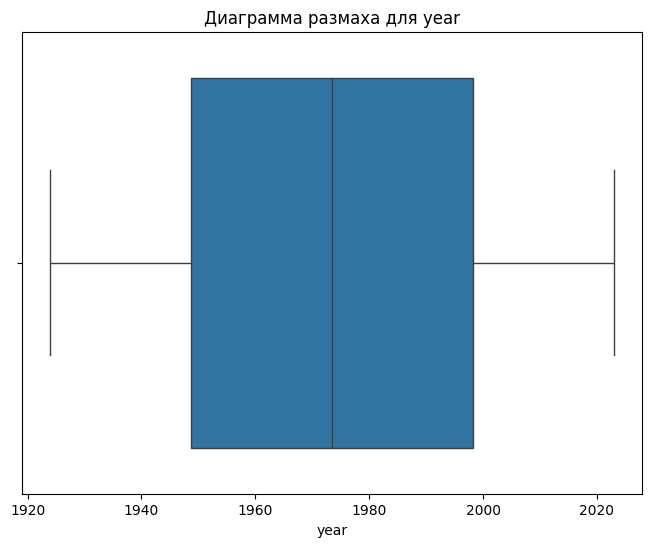


Выбросы для 'year':
Series([], Name: year, dtype: int64)


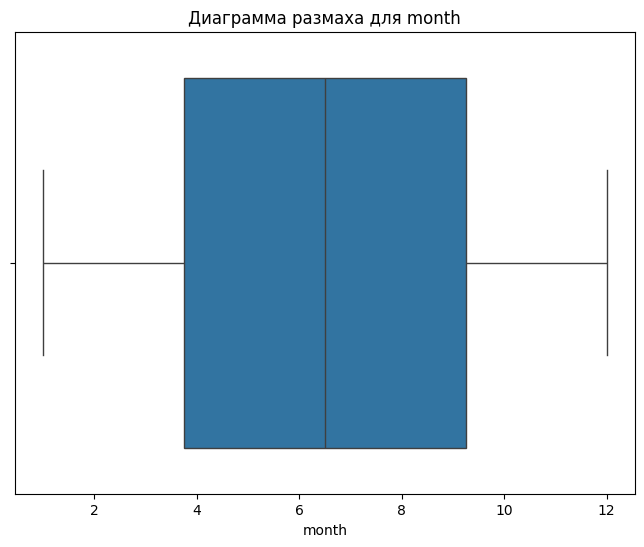


Выбросы для 'month':
Series([], Name: month, dtype: int64)


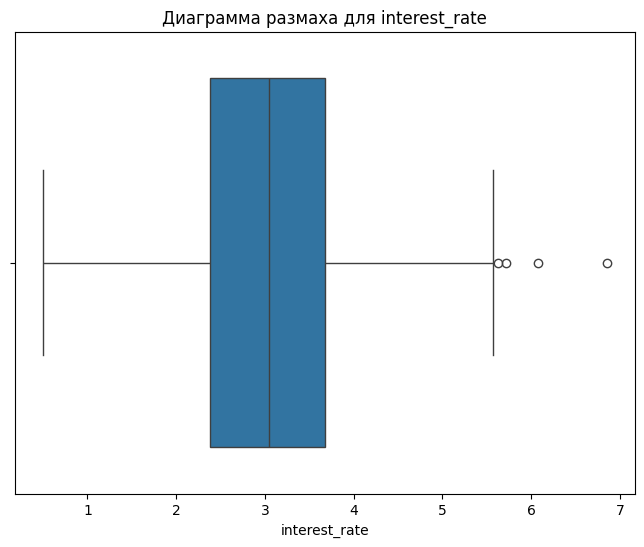


Выбросы для 'interest_rate':
179    5.72
209    6.85
478    6.08
755    5.63
Name: interest_rate, dtype: float64
Количество выбросов в 'interest_rate': 4.


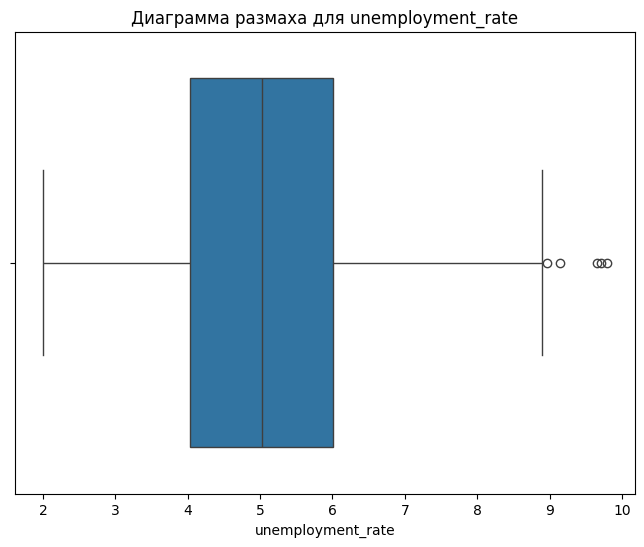


Выбросы для 'unemployment_rate':
415     9.79
734     8.97
757     9.71
835     9.14
1105    9.66
Name: unemployment_rate, dtype: float64
Количество выбросов в 'unemployment_rate': 5.


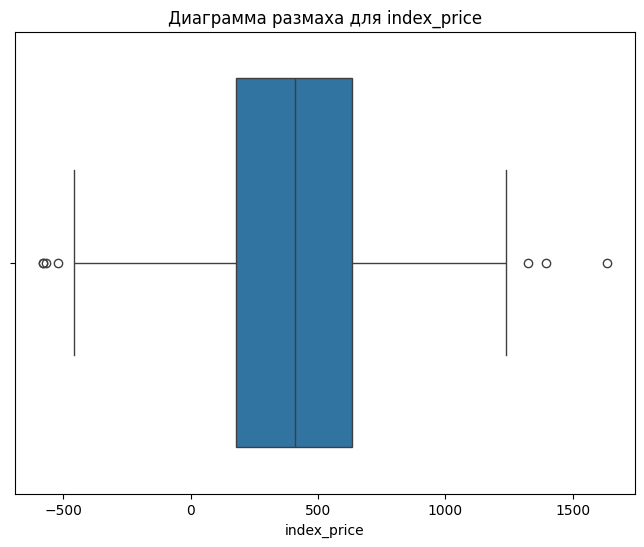


Выбросы для 'index_price':
74      -570.328428
125     1394.659222
209     1634.035645
566     -580.090673
646     -579.625945
975     -519.790795
1161    1326.436129
Name: index_price, dtype: float64
Количество выбросов в 'index_price': 7.


In [14]:
# Анализ распределения данных через гистограммы и выбросы
def plot_distribution_and_outliers(data):
    """
    Отображает гистограммы распределения и анализирует выбросы для числовых атрибутов.
    """
    numerical_data = data.select_dtypes(include='number')

    # Построение гистограмм для каждого числового столбца
    numerical_data.hist(bins=20, figsize=(10, 8))
    plt.tight_layout()
    plt.show()

    # Анализ выбросов с помощью boxplot
    for col in numerical_data.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(x=data[col])
        plt.title(f'Диаграмма размаха для {col}')
        plt.show()

        # Выявление выбросов с использованием IQR
        outliers = identify_outliers(data[col])
        print(f"\nВыбросы для '{col}':\n{outliers}")
        if not outliers.empty:
            print(f"Количество выбросов в '{col}': {len(outliers)}.")




# Функция для поиска выбросов с использованием IQR
def identify_outliers(column_data):
    """
    Определение выбросов с использованием интерквартильного размаха (IQR).
    """
    first_quartile = column_data.quantile(0.25)
    third_quartile = column_data.quantile(0.75)
    iqr = third_quartile - first_quartile
    lower_limit = first_quartile - 1.5 * iqr
    upper_limit = third_quartile + 1.5 * iqr
    outliers = column_data[(column_data < lower_limit) | (column_data > upper_limit)]

    return outliers


plot_distribution_and_outliers(data)

5) Корреляционный анализ


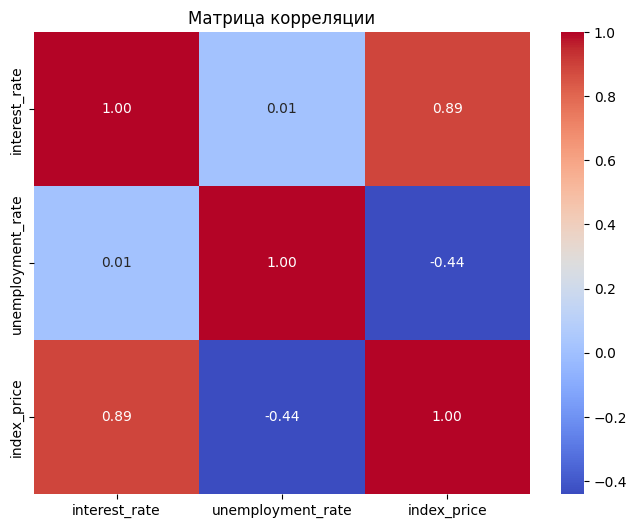


Матрица корреляции:
                    interest_rate  unemployment_rate  index_price
interest_rate           1.000000           0.014553     0.890899
unemployment_rate       0.014553           1.000000    -0.441184
index_price             0.890899          -0.441184     1.000000


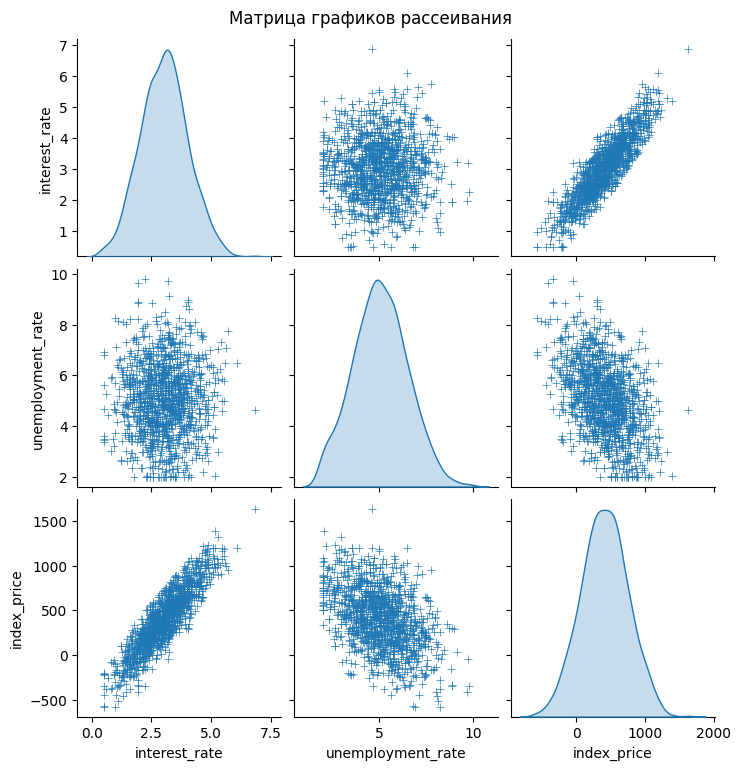

In [15]:
# Анализ корреляции между числовыми атрибутами
def analyze_correlation(data):
    """
    Рассчитывает и визуализирует корреляцию между атрибутами.
    """
    relevant_columns = data[['interest_rate', 'unemployment_rate', 'index_price']]
    correlation_matrix = relevant_columns.corr()

    # Визуализация корреляции в виде тепловой карты
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Матрица корреляции')
    plt.show()

    print("\nМатрица корреляции:\n", correlation_matrix)

# Функция для построения матрицы графиков рассеивания
def scatter_matrix_plot(data):
    """
    Отображает графики рассеивания для числовых переменных.
    """
    relevant_columns = data[['interest_rate', 'unemployment_rate', 'index_price']]

    sns.pairplot(relevant_columns, diag_kind='kde', markers='+')
    plt.suptitle('Матрица графиков рассеивания', y=1.02)
    plt.show()



analyze_correlation(data)
#Построение графиков рассеивания
scatter_matrix_plot(data)

Анализ полученных результатов

- Высокая корреляция:
  - Interest Rate и Index Price: сильная положительная корреляция (0.89). Это говорит о том, что когда процентные ставки растут, индекс цен также растет.
  
- Отрицательная корреляция:
  - Unemployment Rate и Index Price: умеренная отрицательная корреляция (-0.44). Это может говорить о том, что рост безработицы приводит к снижению ценового индекса.
  
- Отсутствие корреляции:
  - Interest Rate и Unemployment Rate: практически нет связи (0.01). Это говорит о том, что процентные ставки и уровень безработицы не зависят друг от друга в этих данных.

В целом можно сказать что видно, что между процентной ставкой и индексом цен существует сильная положительная корреляция и средние значения + стандартные откланения показали, что данные сильно колеблятся.

